# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


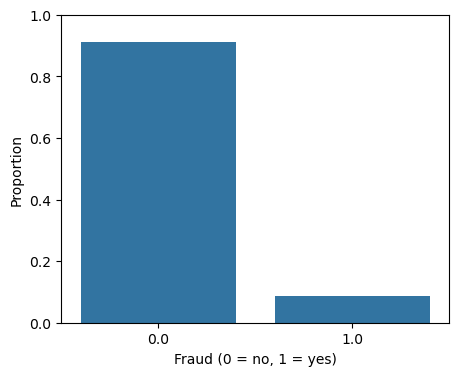

In [ ]:

print(df["fraud"].value_counts(normalize=True))
import seaborn as sns
import matplotlib.pyplot as plt
fraud_prop= (df["fraud"].value_counts(normalize=True).rename("proportion").reset_index())
fraud_prop.columns=["fraud","prop"]

plt.figure(figsize=(5,4))
sns.barplot(data=fraud_prop,x="fraud",y="prop")
plt.ylabel("Proportion")
plt.xlabel("Fraud (0 = no, 1 = yes)")
plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

features = df.drop(columns=["fraud"])
target = df["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC", roc_auc_score(y_test, y_proba))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix", confusion_matrix(y_test, y_pred))

Accuracy: 0.95875
ROC-AUC 0.9668931031140444
Classification report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

Confusion matrix [[181283   1274]
 [  6976  10467]]


In [ ]:

from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over.fit_resample(X_train_scaled, y_train)

log_reg_over = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg_over.fit(X_train_over, y_train_over)

y_pred_over = log_reg_over.predict(X_test_scaled)
y_proba_over = log_reg_over.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_over))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_over))
print("Classification report:")
print(classification_report(y_test, y_pred_over))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_over))

Accuracy: 0.93469
ROC-AUC: 0.9795556683011314
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

Confusion matrix: [[170347  12210]
 [   852  16591]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = under.fit_resample(X_train_scaled, y_train)

log_reg_under = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg_under.fit(X_train_under, y_train_under)

y_pred_under = log_reg_under.predict(X_test_scaled)
y_proba_under = log_reg_under.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_under))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_under))
print("Classification report:")
print(classification_report(y_test, y_pred_under))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_under))

Accuracy: 0.93448
ROC-AUC: 0.979540310967081
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

Confusion matrix:
 [[170295  12262]
 [   842  16601]]


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=5)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

log_reg_smote = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = log_reg_smote.predict(X_test_scaled)
y_proba_smote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))
print("Classification report:")
print(classification_report(y_test, y_pred_smote))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_smote))


=== SMOTE ===
Accuracy: 0.934645
ROC-AUC: 0.9795620551784171
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

Confusion matrix:
 [[170334  12223]
 [   848  16595]]


After resampling (over-, under-sampling and SMOTE), accuracy drops slightly but recall for the fraud class jumps from about 0.60 to 0.95, and ROC-AUC improves, meaning the model detects many more fraudulent transactions.

This trade-off is desirable in fraud detection: we accept more false positives in exchange for missing far fewer fraud cases.

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 